## Opis problému a motivácia

Kancelárske a obytné priestory zodpovedajú približne 35% celosvetovej spotreby energie a s tým spojených emisií oxidu uhličitého. Za posledných 10 rokov táto hodnota narástla o 15% a vďaka urbanizácii naďalej rastie. Na základe alarmujúcich prejavov klimatických zmien je jasné, že tento trend zvyšovania spotreby energie nie je dlhodobo udržateľný. Z tohto dôvodu je v súčasnosti veľký záujem o zvýšenie energetickej efektívnosti bytových a kancelárskych priestorov a tým pádom znížiť energetickú spotrebu. Optimalizáciou vykurovania, ventilácie a klimatizácie by sa podľa odhadov dala dosiahnuť až 40% úspora na energiách.
V našom projekte sme sa problém klasifikácie obsadenosti miestnosti. Riešenie tohto problému je kľúčové v kontexte energeticky efektívnych a úsporných budov, keďže výsledky tejto klasifikácie by sa dali použiť na optimálne nastavenie vykurovacieho a klimatizačného systému. K problému klasifikácie je možné pristupovať dvoma spôsobmi - priamo a nepriamo.
Priamy prístup znamená priamo detekovať osoby v miestnosti napríklad pomocou infračerveného snímača alebo videozáznamu. Tieto riešenia sa už v súčasnosti nasadzujú do praxe, často sa však stretávajú s odporom a obavami z narušenia súkromia.
Nepriamy prístup znamená klasifikovať obsadenosť pomocou meraní atribútov okolitého prostredia, ako napríklad kvalita vzduchu, teplota, vlhkosť a podobne. Takýto prístup nemonitoruje priamo jednotlivé osoby a nenarušuje tak súkromie, ale na spoľahlivé fungovanie si vyžaduje dátové modely, ktoré sú schopné z nameraných veličín presne určiť obsadenosť sledovaného priestoru.
V rámci svojho projektu sa pokúsime vytvoriť dátový model, ktorý bude schopný z nameraných environmentálnych dát klasifikovať obsadenosť miestnosti.


## Opis dát

V našej práci sme sa rozhodli použiť dátovú sadu Occupancy, ktorá sa nachádza na UCL Machine Learning Repository. Táto sada je určená na binárnu klasifikáciu v ktorej sa určuje, či je miestnosť obsadená alebo nie. Táto klasifikácia sa určuje na základe atribútov získaných z rôznych senzorov, ukážku týchto atribútov je možné vidieť nižšie. Informácie zo senzorov boli zachytávané v minútových  intervaloch. Informácie o obsadenosti boli získané pomocou fotografií miestnosti, ktoré boli zachytené každú minútu.

In [43]:
import pandas as pd

data = pd.read_csv("data.csv")

feature_cols = ['date','Temperature','Humidity','CO2',
                'HumidityRatio','Light','Occupancy']
X = data[feature_cols] 

print(X.head(5));
print("\n")
print("Opis dát")
X.describe()

             date  Temperature  Humidity     CO2  HumidityRatio  Light  \
0  2/4/2015 17:51        23.18   27.2720  721.25       0.004793  426.0   
1  2/4/2015 17:51        23.15   27.2675  714.00       0.004783  429.5   
2  2/4/2015 17:53        23.15   27.2450  713.50       0.004779  426.0   
3  2/4/2015 17:54        23.15   27.2000  708.25       0.004772  426.0   
4  2/4/2015 17:55        23.10   27.2000  704.50       0.004757  426.0   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  


Opis dát


Temperature     Humidity          CO2  HumidityRatio        Light  \
count  8143.000000  8143.000000  8143.000000    8143.000000  8143.000000   
mean     20.619084    25.731507   606.546243       0.003863   119.519375   
std       1.016916     5.531211   314.320877       0.000852   194.755805   
min      19.000000    16.745000   412.750000       0.002674     0.000000   
25%      19.700000    20.200000   439.000000       0.003078     0.000000   
50%      20.390000    26.222500   453.500000       0.003801     0.000000   
75%      21.390000    30.533333   638.833333       0.004352   256.375000   
max      23.180000    39.117500  2028.500000       0.006476  1546.333333   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

V tejto sade sa nachádza viac ako 20 000 inštancií a obsahuje 7 atribútov. Dátová sada neobsahuje žiadne chýbajúce dáta, ale na prvý pohľad je hodnota svetla 0 veľmi často pri miestnosti, ktorá nie je obsadená. Toto môže byť spôsobené tým, že bola práve noc, alebo sa v miestnosti nenachádza okno - tomuto sa budeme bližšie venovať pri predspracovaní dát.
Medzi ďalšie podstatné atribúty patrí podiel CO2 v miestnosti, vlhkosť a teplota v izbe. Zmeny týchto atribútov sú veľmi dôležité pre správnu klasifikáciu obsadenosti v izbe a aj z toho dôvodu môže nastať problém, ak je miestnosť obsadená, ale sú napríklad otvorené dvere, ktoré spôsobujú zmeny v hodnotách.


## Medián atribútov

Nižšie je možné vidieť mediánové hodnoty atribútov. Hodnota svetla(atribút Light) je 0, keďže väčšinu času bola miestnosť neobývaná a tým pádom bolo zhastnuté svetlo - teda väčšinou bola jeho hodnota 0.

In [45]:
import statistics
import pandas as pd

data = pd.read_csv("data.csv")

print("Temperature")
print(statistics.median(data['Temperature']))
print("\n")

print("Humidity")
print(statistics.median(data['Humidity']))
print("\n")

print("Light")
print(statistics.median(data['Light']))
print("\n")

print("CO2")
print(statistics.median(data['CO2']))
print("\n")

print("HumidityRatio")
print(statistics.median(data['HumidityRatio']))
print("\n")

print("Occupancy")
print(statistics.median(data['Occupancy']))

Temperature
20.39


Humidity
26.2225


Light
0.0


CO2
453.5


HumidityRatio
0.00380077


Occupancy
0


## Matica korelácie

Na obrázku nižšie sa nachádza základná matica korelácie niektorých atribútov. Z obrázku je možné vidieť, že najviac spolu koreluje teplota spolu s vlhkosťou (ak nerátame vlhkosť s pomerom vlhkosti a teploty).

In [46]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','Light']
X = data[feature_cols] 

corr = X.corr()
# plot correlation matrix
names = ['temp', 'humidity', 'light', 'co2', 'ratio']

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Výskyt hodnôt atribútov

V tejto časti vizualizujeme aké hodnoty jednotlivých atribútov sa nachádzajú v dátach. Tieto atribúty predstavujú záznamy z 5 dní, ktoré boli merané každú minutu. Toto je možné pozorovať pri atribúte Light, kde je väčšina hodnôt na 0 a 5x hodnoty na určitú dobu vyskočili - toto je spôsobené tým, že zaznamenávaná miestnosť je kancelária, v ktorej sa svietilo prevažne v pracovných časoch.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

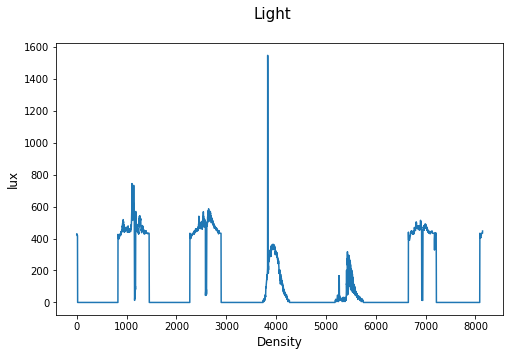

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

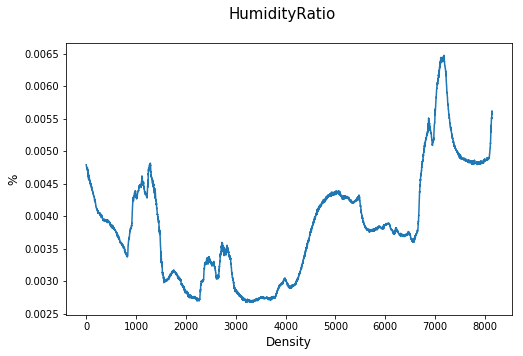

<Figure size 432x288 with 0 Axes>

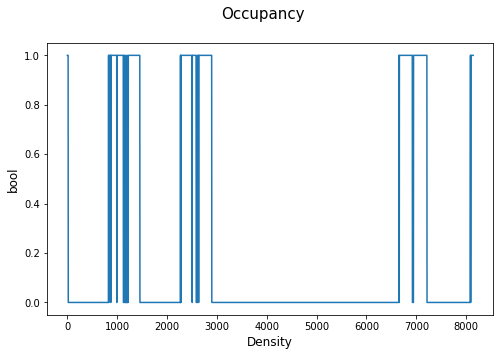

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('data.csv')

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['Temperature'])
plt.suptitle('Temperature', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('Celsius', fontsize=12)
plt.show()

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['Humidity'])
plt.suptitle('Humidity', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.show()

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['Light'])
plt.suptitle('Light', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('lux', fontsize=12)
plt.show()

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['CO2'])
plt.suptitle('CO2', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('ppm', fontsize=12)
plt.show()

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['HumidityRatio'])
plt.suptitle('HumidityRatio', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.show()

fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['Occupancy'])
plt.suptitle('Occupancy', fontsize=15)
plt.xlabel('Density', fontsize=12)
plt.ylabel('bool', fontsize=12)
plt.show()


## Boxplot

V nasledujúcich vizualizáciách boxplotu jednotlivých atribútov môžeme pozorovať ich výskyt outlierov. Ak by sme predpokladali, že pomocou použitých senzorov boli namerané správne dáta v každom prípade, tak outliery nepredstavujú nesprávne hodnoty, ale špeciálne prípady a preto by nemali byť odstránené len z dôvodu dosiahnutia lepších výsledkov.

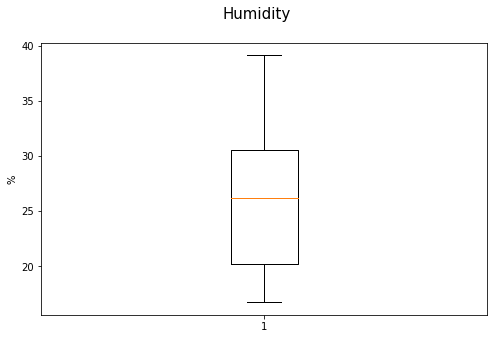

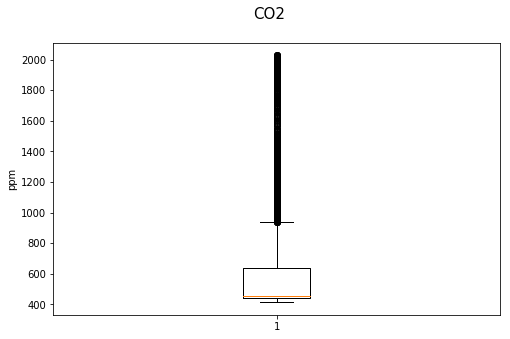

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
df = pd.read_csv('data.csv')
data = [df['Temperature']]
fig = plt.figure(figsize=(8,5))
fig.suptitle('Temperature', fontsize=15)
ax = fig.add_subplot(111)
ax.boxplot(data)
plt.ylabel("Celsius")
plt.show()
data = [df['Humidity']]
fig = plt.figure(figsize=(8,5))
fig.suptitle('Humidity', fontsize=15)
ax = fig.add_subplot(111)
ax.boxplot(data)
10
plt.ylabel("%")
plt.show()
data = [df['Light']]
fig = plt.figure(figsize=(8,5))
fig.suptitle('Light', fontsize=15)
ax = fig.add_subplot(111)
ax.boxplot(data)
plt.ylabel("Lux")
plt.show()
data = [df['CO2']]
fig = plt.figure(figsize=(8,5))
fig.suptitle('CO2', fontsize=15)
ax = fig.add_subplot(111)
ax.boxplot(data)
plt.ylabel("ppm")
plt.show()
data = [df['HumidityRatio']]
fig = plt.figure(figsize=(8,5))
fig.suptitle('HumidityRatio', fontsize=15)
ax = fig.add_subplot(111)
ax.boxplot(data)
plt.ylabel("Celsius")
plt.show()

## Definovanie úlohy

V našej práci sa chceme venovať úlohe binárnej klasifikácie, kde budeme určovať, či je miestnosť obsadená, alebo nie.  Ešte pred klasifikáciou spravíme predspracovanie dát, v ktorom zadefinujeme presnejšie korelácie medzi atribútmi a identifikujeme zaujímavé črty dátovej sady, ako napríklad prudké zmeny svetla, teploty deň/noc a pod.

## Príprava dát

Dátová sada obsahuje klasifikačné hodnoty obývanosti izby(Occupancy) značiek 0 a 1, tým pádom sú tieto hodnoty už pripravené na binárnu klasifikáciu. Taktiež máme atribút HumidityRatio, čo je pomer medzi teplotou a vlhkosťou. Tento pomer sa tu nachádza z toho dôvodu, že tieto dva atribúty majú spoločnú koreláciu. Nižšie je ukázané ako sme z atribútu dátum získali iba čas, ako sme sa vysporiadali s dátami z víkendov a ako sme sa vysporiadali s nevhodným atribútom Light.

## Atribút Light

Tento atribút sme sa rozhodli vylúčiť. Je to hlavne z toho dôvodu, že v neobývanej izbe sú jeho hodnoty vždy na 0. Iba veľmi málo záznamov obývanej izby je väčších ako 0 - sú to iba krajné hodnoty, z čoho vyplýva že to bolo keď ludia prichádzali a odchádzali.

Pomocou tohoto samostatného atribútu sme skúsili tiež natrénovať algoritmus Random Forest a dosiahli sme nasledovné hodnoty metrík:

Accuracy: 0.97

Precision: 0.98

Recall: 0.94

Tuto je možné vidieť, že tento atribút je veľmi presný sám o sebe a aj preto sme ho z našich modelov vylúčili.
Nižšie je vizualizácia toho, ako sa zmenili hodnoty svetla v porovnaní s neobývanou/obývanou izbou.


<Figure size 432x288 with 0 Axes>

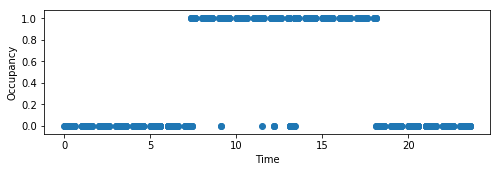

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('test1Day.csv')

x = data['time']
y = data['Occupancy']
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.scatter(x,y)

plt.ylabel("Occupancy")
plt.xlabel("Time")
plt.show()

x = data['time']
y = data['Light']
plt.figure(figsize=(8,5))
plt.subplot(2,1,2)
plt.scatter(x,y)

plt.ylabel("Light(lux)")
plt.xlabel("Time")
          
plt.show()

## Rozdelenie dátumu na deň, mesiac, rok, hodiny a minúty

V dátovej sade sa nachádza atribút date s nasledovným formátom: d/m/yyyy hh:mm. Z tohoto atribútu sme sa rozhodli vybrať čas, ktorý sme neskôr použili na trénovanie algoritmov. Okrem toho sme dátum rozdelili aj na dni, mesiace a roky pre uľahčenie neskorších vizualizácií. Atribút času sme z formátu hh:mm premenili na float formát hh.mm. Z dôvodu toho, že typ float obsahuje hodnoty <0-1> a formátované minuty <0-0.6>, tak sme minuty normalizovali - príklad: čas 17:30 sme zmenili na hodnotu 17.5.

Pre atribút čas sme sa rozhodli z toho dôvodu, že dáta boli zaznamenávané v kancelárií, čo spôsobilo, že miestnosť bola obývaná v podobných časoch. Na základe prvých experimentov sa to ukázalo ako vhodné riešenie, keďže pri algoritme Random Forest boli naše použité metriky pri použití všetkých atribútov(už bez svetla) bez času nasledovné:

Accuracy: 0.70

Precision: 0.59

Recall: 0.92

Metriky pri použití všetkých atribútov(bez svetla) s časom:

Accuracy: 0.94

Precision: 0.99

Recall: 0.88

Aby bol tento atribút čo najviac užitočný bolo nevyhnutné aby sme z dátovej sady úplne odstránili hodnoty namerané cez víkendy, keďže vtedy bola miestnosť vždy počas celých 48hod neobývaná.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
'''
df = pd.read_csv('data.csv')

#print(df['date'])
datestring = df['date'][0]
day, month, year = df['date'][0].split('/')

i = 0;
for row in df['date']:
    month, day, yearTime = df['date'][i].split('/')
    year, time = yearTime.split(' ')
    hour, minute = time.split(':')
    df['day'][i] = day
    df['month'][i] = month
    df['year'][i] = year
    newM = float(minute) * 1.7
    newM = int(newM)
    minute = str(newM)
    timeF = hour + "." + minute
    df['time'][i] = timeF
    df['timeRegular'][i] = time
    print(day + " " + month + " " + year + " " + timeF + " " + time)
    i=i+1
    
df.to_csv('dataTime.csv')
'''
df = pd.read_csv('dataTime.csv')
feature_cols = ['date','Temperature','Humidity','CO2','HumidityRatio',
                'Light','Occupancy','day','month','year','time','timeRegular']
X = df[feature_cols] 

print(X.head(5));


             date  Temperature  Humidity     CO2  HumidityRatio  Light  \
0  2/4/2015 17:51        23.18   27.2720  721.25       0.004793  426.0   
1  2/4/2015 17:51        23.15   27.2675  714.00       0.004783  429.5   
2  2/4/2015 17:53        23.15   27.2450  713.50       0.004779  426.0   
3  2/4/2015 17:54        23.15   27.2000  708.25       0.004772  426.0   
4  2/4/2015 17:55        23.10   27.2000  704.50       0.004757  426.0   

   Occupancy  day  month  year   time timeRegular  
0          1    4      2  2015  17.86       17:51  
1          1    4      2  2015  17.86       17:51  
2          1    4      2  2015  17.90       17:53  
3          1    4      2  2015  17.91       17:54  
4          1    4      2  2015  17.93       17:55  


## Pridanie atribútu - risingCO2

Po pridaní atribútu čas sme zistili, že najväčšie chyby nastávaju medzi 15:00 a 18:00. Je to z toho dôvodu, že ľudia opúšťajú miestnosť zvyčajne v týchto časoch. Pokiaľ ale miestnosť neopustili, tak CO2 sa stále prudko zvyšuje. Preto sme sa rozhodli pridať atribút risingCO2, ktorý má hodnotu 1, ak za posledných 20 minút CO2 stúplo minimálne o 40 jednotiek ppm. V ostatných prípadoch sa hodnota nastavila na 0. Tento atribút nám pomohol zlepšiť použité metriky(Accuracy, Precision, Recall) pri modely Random Forest približne o 2%.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('data.csv')

i = 0;
for row in df['CO2']:
    if i>20:
        diff = float(df['CO2'][i])-float(df['CO2'][i-20])
        if diff>40:
            df['risingCO2'][i]=1
        else:
            df['risingCO2'][i]=0
    else:
        df['risingCO2'][i]=0
    i=i+1
    
df.to_csv('dataTime.csv')

## Metriky vyhodnocovania

Pri našich modeloch sme sa rozhodli použiť známe metriky používané pri binárnej klasifikácií. Pri tejto klasifikácií je jedným z najdôležitejších vyhodnotení percentuálny výsledok úspešnosti(accuracy). Tento spôsob sme brali ako základný ukazovateľ správnosti použitia atribútov v modeli. 

confusion matrix: špecifická vizualizácia výkonu algoritmu

    TP: správne označená miestnosť ako obsadená
    TN: správne označená miestnosť ako neobsadená
    FP: nesprávne označená miestnosť ako obsadená
    FN: nesprávne označená miestnosť ako neobsadená

accuracy: ACC = (TP+TN)/(P+N)

precision: PPV = TP/(TP+FP)

hit-rate: TPR = TP/P

recall: TP/(TP+FN)

F1: 2x(PPVxTPR)/(PPV+TPR)

Tieto metriky sme použili pri doteraz všetkých testovaných modeloch a pod každým modelom je možné ich vidieť.

Metriky sú bližšie popísané v článku.

## Grid Search

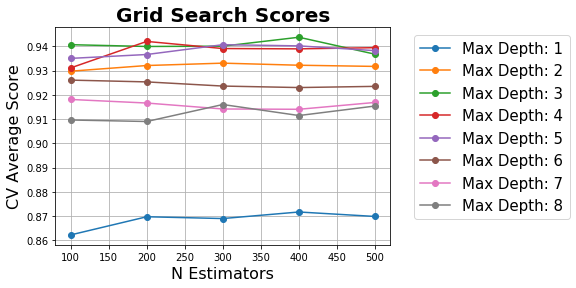

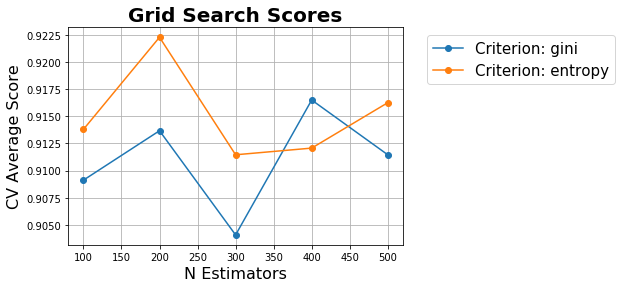

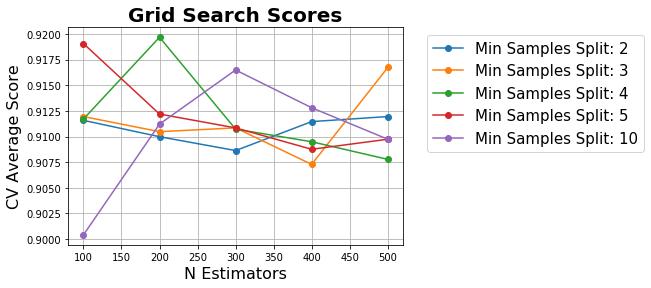

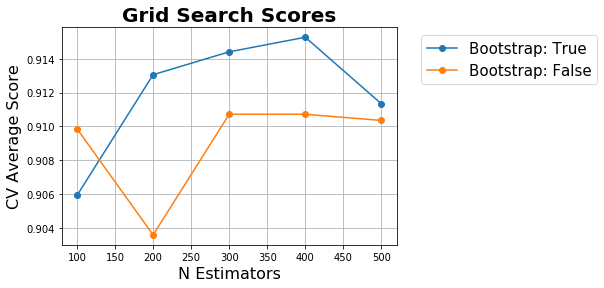

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

#Nacitanie trenovacej a testovacej sady
data = pd.read_csv('dataTime.csv')

dataTest = pd.read_csv('test1Day.csv')

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','time','risingCO2']
X = data[feature_cols] 
y=data['Occupancy']

Xnew = dataTest[feature_cols]
ynew = dataTest['Occupancy']

feature_list = list(data.columns)

#Random Forest klasifikator
rfc=RandomForestClassifier()

nEstimators = [100, 200, 300, 400, 500]
maxDepth = [1,2,3,4,5,6,7,8]
criterion = ['gini', 'entropy']
minSamplesSplit = [2,3,4,5,10]
bootstrap = [True, False]
maxFeatures = ['sqrt','log2','auto']

#Max Depth
param_grid = { 
    'n_estimators': nEstimators,
    'max_depth': maxDepth
}

clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#Trenovanie
clf.fit(X,y)

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=15)
    ax.grid('on')

plot_grid_search(clf.cv_results_, nEstimators, maxDepth, 'N Estimators', 'Max Depth')
plt.show()

#Criterion
param_grid = { 
    'n_estimators': nEstimators,
    'criterion': criterion
}

clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#Trenovanie
clf.fit(X,y)

plot_grid_search(clf.cv_results_, nEstimators, criterion, 'N Estimators', 'Criterion')
plt.show()

#Min Samples Split
param_grid = { 
    'n_estimators': nEstimators,
    'min_samples_split': minSamplesSplit
}

clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#Trenovanie
clf.fit(X,y)

plot_grid_search(clf.cv_results_, nEstimators, minSamplesSplit, 'N Estimators', 'Min Samples Split')
plt.show()

#Bootstrap
param_grid = { 
    'n_estimators': nEstimators,
    'bootstrap': bootstrap
}

clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#Trenovanie
clf.fit(X,y)

plot_grid_search(clf.cv_results_, nEstimators, bootstrap, 'N Estimators', 'Bootstrap')
plt.show()

#Vsetky spolu
param_grid = { 
    'n_estimators': nEstimators,
    'max_depth': maxDepth,
    'criterion': criterion,
    'min_samples_split': minSamplesSplit,
    'bootstrap': bootstrap,
    'max_features': maxFeatures
}

clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#Trenovanie
clf.fit(X,y)

print(clf.best_params_)

## Modely - random forest

Ako základný model pre testovanie atribútov sme pre túto časť použili Random Forest. Pre tento model sme skúšali rôzne kombinácie atribútov a aj pomocou neho sme vyhodnocovali, či odstránenie/pridanie atribútov malo vplyv na výsledky. Pri použití tohoto modelu sa nám podarilo dosiahnuť pomerne dobré výsledky aj po odstránení atribútu Light. Tieto výsledky boli zlepšené využívaním atribútu čas. Pod modelom sa nachádza vizualizácia toho, ktoré hodnoty tento model predikoval nesprávne na testovacej množine.

Testovacia množina ktorú sme momentálne použili pozostáva zo záznamov z 1 pracovného dňa.

Na základe dôležitosti sa ukázal atribút CO2 ako najpodstatnejší(45%). Ak sme použili svetlo, tak malo dôležitosť až 60%. Význam jednotlivých atribútov je možné vidieť nižšie na pie-charte.
Pod samotným modelom sa nachádza aj tabuľka úspešnosti pri použití rôznych atribútov.

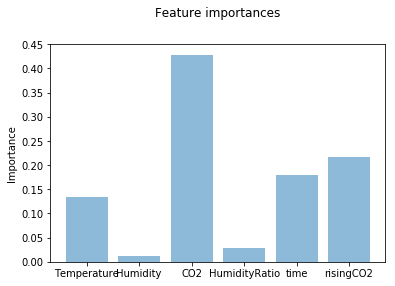

Accuracy: 0.9708333333333333
Precision: 0.9456
Recall: 0.986644407345576
F1 Macro: 0.970161977834612
F1 Micro: 0.9708333333333333
F1 Weighted: 0.9709141446433645


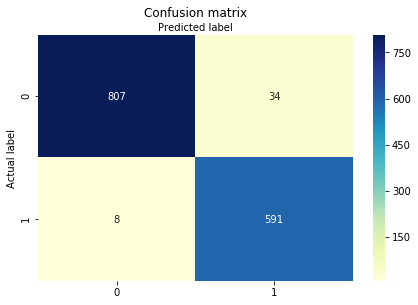

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

#Nacitanie trenovacej a testovacej sady
data = pd.read_csv('dataTime.csv')

dataTest = pd.read_csv('test1Day.csv')

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','time','risingCO2']
X = data[feature_cols] 
y=data['Occupancy']

Xnew = dataTest[feature_cols]
ynew = dataTest['Occupancy']

feature_list = list(data.columns)

#Random Forest klasifikator
clf=RandomForestClassifier(n_estimators = 20, criterion = 'entropy', 
                      max_depth = 4, max_features = 'auto', 
                      bootstrap = False, min_samples_split = 2)

#Parametre pre temp, humidity, CO2, humiRatio, Light - 
                            #n_estimators = 200, criterion = 'gini', 
                            #max_depth = 3, max_features = 'auto', 
                            #bootstrap = False, min_samples_split = 10
        
#Parametre pre temp, humidity, CO2, humiRatio, Light, time - 
                            #n_estimators = 500, criterion = 'gini', 
                            #max_depth = 3, max_features = 'auto', 
                            #bootstrap = False, min_samples_split = 3

#Parametre pre temp, humidity, CO2, humiRatio, time - 
                            #n_estimators = 100, criterion = 'entropy', 
                            #max_depth = 3, max_features = 'sqrt', 
                            #bootstrap = True, min_samples_split = 4

#Parametre pre temp, humidity, CO2, humiRatio - 
                            #n_estimators = 300, criterion = 'gini', 
                            #max_depth = 2, max_features = 'sqrt', 
                            #bootstrap = False, min_samples_split = 2

#Parametre pre Light - 
                       #n_estimators = 100, criterion = 'gini', 
                       #max_depth = 1, max_features = 'sqrt', 
                       #bootstrap = True, min_samples_split = 2

#Parametre pre time - 
                      #n_estimators = 100, criterion = 'entropy', 
                      #max_depth = 3, max_features = 'sqrt', 
                      #bootstrap = True, min_samples_split = 4
            
#Parametre pre temp, humidity, CO2, humiRatio, time, risingCO2 - 
                      #n_estimators = 20, criterion = 'entropy', 
                      #max_depth = 4, max_features = 'auto', 
                      #bootstrap = False, min_samples_split = 2

#Trenovanie
clf.fit(X,y)

#Ziskanie a vizualizovanie dolezitosti atributov
importances = list(clf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(feature_cols, importances)]

feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], reverse = True)

labels = feature_cols
sizes = importances
plt.bar(labels, sizes, align='center', alpha=0.5)
plt.ylabel('Importance')
plt.title('Feature importances', y=1.1)
plt.show()

#Kontrola na testovacej sade
y_predNew=clf.predict(Xnew)

#Vizualizacia confusion matice a vypis ostatnych metrik
cnf_matrix = metrics.confusion_matrix(ynew, y_predNew)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(ynew, y_predNew))
print("Precision:",metrics.precision_score(ynew, y_predNew))
print("Recall:",metrics.recall_score(ynew, y_predNew))

print("F1 Macro:",metrics.f1_score(ynew, y_predNew, average='macro'))
print("F1 Micro:",metrics.f1_score(ynew, y_predNew, average='micro'))
print("F1 Weighted:",metrics.f1_score(ynew, y_predNew, average='weighted'))

#Zapisanie predikovanych hodnot modelu(pre neskorsiu vizualizaciu toho, kde sa model pomylil)
ynew['preds'] = y_predNew

dataset = pd.DataFrame({'Occupancy_predictions':ynew['preds'][:]})
df_out = pd.merge(dataTest,dataset,how = 'left',
                  left_index = True, right_index = True)
df_out.to_csv('predictions.csv')

## Vyhodnotenie Random Forest modelu

V tabuľke nižšie sa nachádzajú výstupy modelu RandomForest pri použití rôznych kombinácií atribútov. V ďalšej tabuľke sú výsledky po použití Grid search. Tieto tabuľky sú bližšie popísané v článku.

Názvy atribútov boli z dôvodu veľkosti tabuľky skrátené:

Temperature - temp

CO2 - CO2

Humidity - h

HumidityRatio - hr

Light - l

time - time

In [54]:
from astropy.table import Table, Column
import numpy as np

a = ["temp, CO2, h, hr, l", 
     "temp, CO2, h, hr, l, time",
     "temp, CO2, h, hr, time",
     "temp, CO2, h, hr, time, risingCO2",
     "temp, CO2, h, hr",
     "l",
     "time"]

b = [94.8, 95.1, 94.5, 94.7, 70.6, 96.8, 88.2]
c = [97.8, 98.2, 98.9, 98.8, 59.4, 98.1, 97.9]
d = [70.6, 88.9, 87.8, 88.5, 92.7, 94.3, 73.1]


t = Table([a, b, c, d], names=('Attributes', 'Accuracy', 
                               'Precision', 'Recall'))
print("Výsledky s predvolenými parametrami")
t

Výsledky s predvolenými parametrami


<Table length=7>
            Attributes            Accuracy Precision  Recall
              str33               float64   float64  float64
--------------------------------- -------- --------- -------
              temp, CO2, h, hr, l     94.8      97.8    70.6
        temp, CO2, h, hr, l, time     95.1      98.2    88.9
           temp, CO2, h, hr, time     94.5      98.9    87.8
temp, CO2, h, hr, time, risingCO2     94.7      98.8    88.5
                 temp, CO2, h, hr     70.6      59.4    92.7
                                l     96.8      98.1    94.3
                             time     88.2      97.9    73.1

In [55]:
from astropy.table import Table, Column
import numpy as np

a = ["temp, CO2, h, hr, l", 
     "temp, CO2, h, hr, l, time",
     "temp, CO2, h, hr, time",
     "temp, CO2, h, hr, time, risingCO2",
     "temp, CO2, h, hr",
     "l",
     "time"]

b = [98.7, 98.8, 95.3, 97.0, 81.2, 98.8, 92.0]
c = [97.6, 97.7, 94.3, 94.5, 71.1, 97.5, 93.8]
d = [99.5, 99.6, 94.4, 98.6, 92.4, 99.8, 86.4]


t = Table([a, b, c, d], names=('Attributes', 'Accuracy', 
                               'Precision', 'Recall'))
print("Výsledky s optimalizovanými parametrami")
t

Výsledky s optimalizovanými parametrami


<Table length=7>
            Attributes            Accuracy Precision  Recall
              str33               float64   float64  float64
--------------------------------- -------- --------- -------
              temp, CO2, h, hr, l     98.7      97.6    99.5
        temp, CO2, h, hr, l, time     98.8      97.7    99.6
           temp, CO2, h, hr, time     95.3      94.3    94.4
temp, CO2, h, hr, time, risingCO2     97.0      94.5    98.6
                 temp, CO2, h, hr     81.2      71.1    92.4
                                l     98.8      97.5    99.8
                             time     92.0      93.8    86.4

## Ukážka obsadenosti a chybne predikovaných hodnôt v čase

Na vizualizácií sú zobrazene nasledovné hodnoty v čase(1 deň): 0 - neobsadená izba, 1 - obsadená izba, 2 - nesprávna predikcia algoritmu Random Forest.

<Figure size 432x288 with 0 Axes>

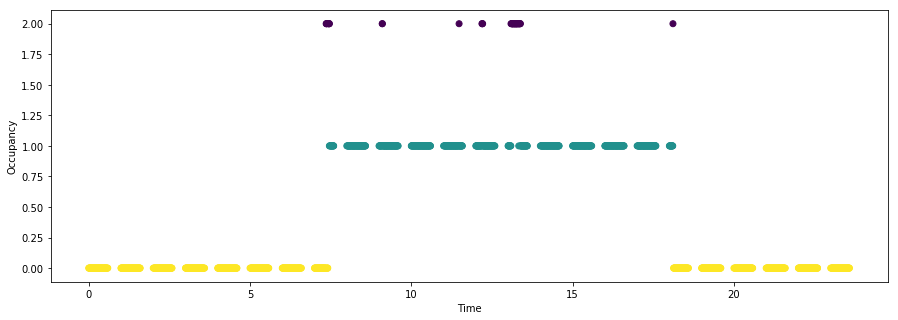

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('predictions.csv')

i = 0;
for row in data['Occupancy']:
    oc = data['Occupancy'][i]
    oc2 = data['Occupancy_predictions'][i]
    if oc != oc2:
        data['Occupancy'][i] = 2
    i=i+1

x = data['time']
y = data['Occupancy']
t = y

fig = plt.figure()
plt.figure(figsize=(15,5))
plt.scatter(x,y, c=t,cmap='viridis_r')
plt.ylabel("Occupancy")
plt.xlabel("Time")
plt.show()

## Modely - decision tree

Okrem modelu Random Forest sme experimentovali aj s modelmi Decision Tree a Logistic Regression, pri ktorých ako je možné vidieť nižšie sme dosiahli trochu horšie výsledky. Pri použití Gradient Boosting sme dosahovali takmer identické výsledky.

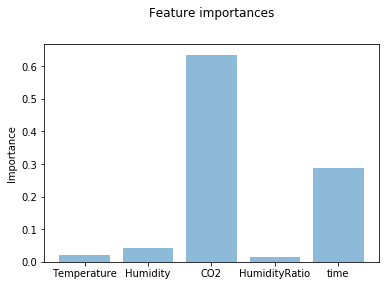

Accuracy: 0.9243055555555556
Precision: 0.9406474820143885
Recall: 0.8731218697829716
F1 Macro: 0.921219649915302
F1 Micro: 0.9243055555555555
F1 Weighted: 0.9238399627747453


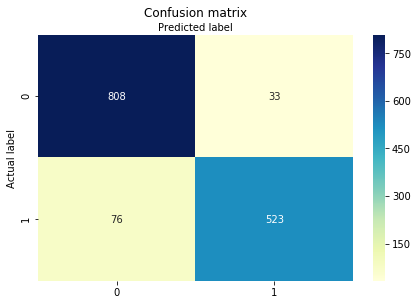

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataTime.csv')

dataTest = pd.read_csv('test1Day.csv')

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','time']
X = data[feature_cols] 
y=data['Occupancy']

Xnew = dataTest[feature_cols]
ynew = dataTest['Occupancy']

feature_list = list(data.columns)

clf=DecisionTreeClassifier()

clf.fit(X,y)

importances = list(clf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(feature_cols, importances)]

feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], reverse = True)
 
labels = feature_cols
sizes = importances
plt.bar(labels, sizes, align='center', alpha=0.5)
plt.ylabel('Importance')
plt.title('Feature importances', y=1.1)
plt.show()

y_predNew=clf.predict(Xnew)

cnf_matrix = metrics.confusion_matrix(ynew, y_predNew)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(ynew, y_predNew))
print("Precision:",metrics.precision_score(ynew, y_predNew))
print("Recall:",metrics.recall_score(ynew, y_predNew))

print("F1 Macro:",metrics.f1_score(ynew, y_predNew, average='macro'))
print("F1 Micro:",metrics.f1_score(ynew, y_predNew, average='micro'))
print("F1 Weighted:",metrics.f1_score(ynew, y_predNew, average='weighted'))

## Modely - logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataTime.csv')

dataTest = pd.read_csv('test1Day.csv')

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','time']
X = data[feature_cols] 
y=data['Occupancy']

Xnew = dataTest[feature_cols]
ynew = dataTest['Occupancy']

feature_list = list(data.columns)

clf=LogisticRegression()

clf.fit(X,y)

y_predNew=clf.predict(Xnew)

cnf_matrix = metrics.confusion_matrix(ynew, y_predNew)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(ynew, y_predNew))
print("Precision:",metrics.precision_score(ynew, y_predNew))
print("Recall:",metrics.recall_score(ynew, y_predNew))

print("F1 Macro:",metrics.f1_score(ynew, y_predNew, average='macro'))
print("F1 Micro:",metrics.f1_score(ynew, y_predNew, average='micro'))
print("F1 Weighted:",metrics.f1_score(ynew, y_predNew, average='weighted'))

Accuracy: 0.8784722222222222
Precision: 0.8693379790940766
Recall: 0.8330550918196995
F1 Macro: 0.8741454249614571
F1 Micro: 0.8784722222222222
F1 Weighted: 0.8780670913925627


## Modely - Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataTime.csv')

dataTest = pd.read_csv('test1Day.csv')

feature_cols = ['Temperature','Humidity','CO2',
                'HumidityRatio','time']
X = data[feature_cols] 
y=data['Occupancy']

Xnew = dataTest[feature_cols]
ynew = dataTest['Occupancy']

feature_list = list(data.columns)

clf=GradientBoostingClassifier()

clf.fit(X,y)

y_predNew=clf.predict(Xnew)

cnf_matrix = metrics.confusion_matrix(ynew, y_predNew)
cnf_matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(ynew, y_predNew))
print("Precision:",metrics.precision_score(ynew, y_predNew))
print("Recall:",metrics.recall_score(ynew, y_predNew))

print("F1 Macro:",metrics.f1_score(ynew, y_predNew, average='macro'))
print("F1 Micro:",metrics.f1_score(ynew, y_predNew, average='micro'))
print("F1 Weighted:",metrics.f1_score(ynew, y_predNew, average='weighted'))

Accuracy: 0.9506944444444444
Precision: 0.9765342960288809
Recall: 0.9031719532554258
F1 Macro: 0.9486548773095638
F1 Micro: 0.9506944444444444
F1 Weighted: 0.9503746516881042
